In [1]:
import pandas as pd
from matplotlib import pyplot as plt

Veri setinin başı:
                 X               Y        X.1        Y.1   KAZA TURU  \
0  35508782834207  38707161168583  38.707161  35.508783  Yaralamali   
1  35434624154945  38735652082362  38.735652  35.434624  Yaralamali   
2  35529938002123  38733578034397  38.733578  35.529938  Yaralamali   
3  35551174358534  38677216094917  38.677216  35.551174  Yaralamali   
4  35458740002115  38689680085274  38.689680  35.458740  Yaralamali   

   KGM ciddiyet seviyesi  Kaza Ciddiyet Seviyesi  AY MEVSİM  KAZA SAAT  ...  \
0                      3                       0   1    kis        0.0  ...   
1                      3                       0   1    kis       17.0  ...   
2                      3                       0   1    kis       20.0  ...   
3                     30                       4   1    kis        7.0  ...   
4                     18                       2   1    kis       16.0  ...   

  KAPLAMA CINSI  SERIT SAYISI AYDINLATMA  Unnamed: 21  Yasal Hız Limit  \
0   

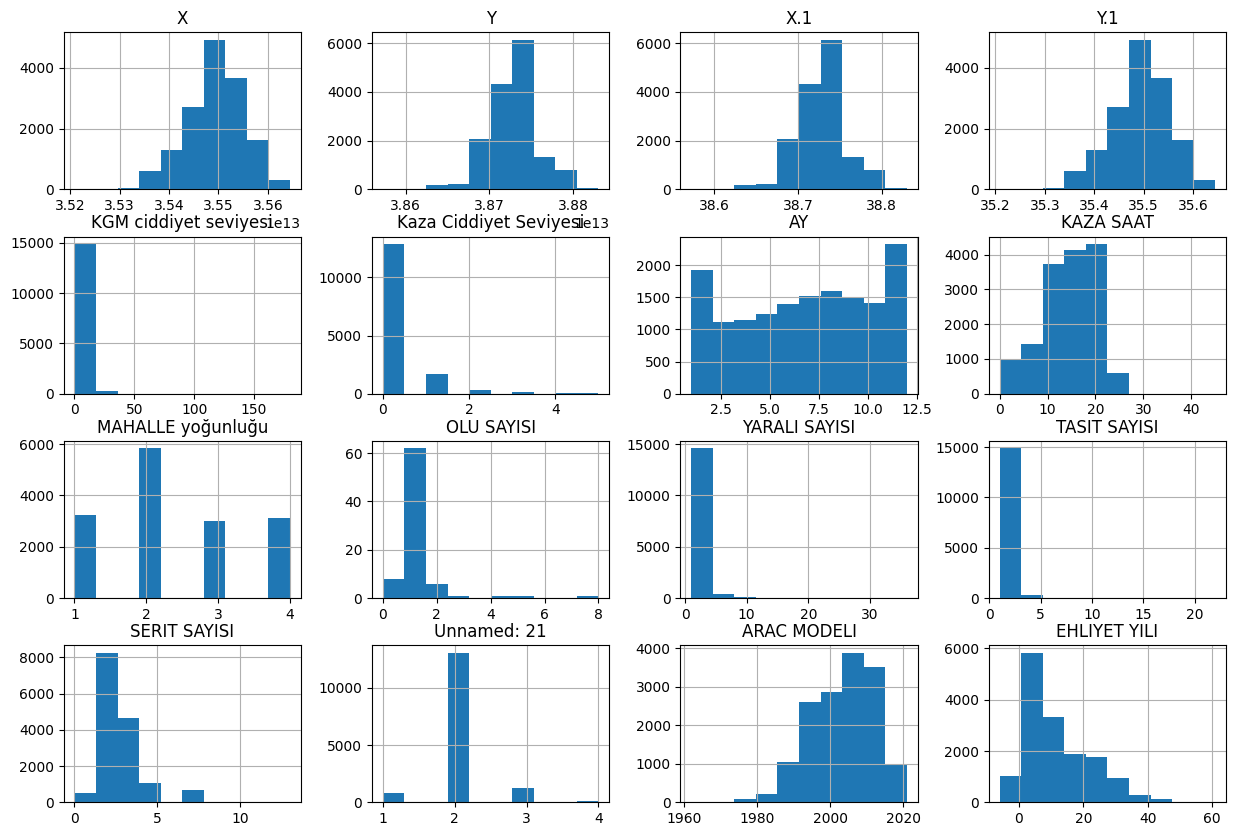

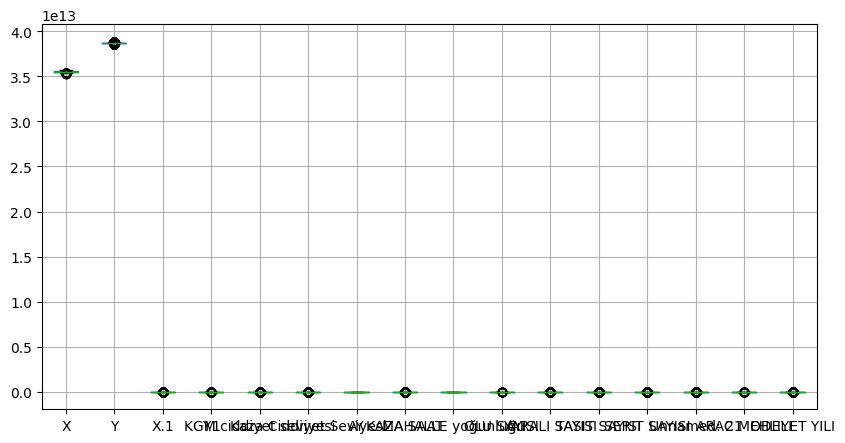

In [4]:

# Veri setini oku
data = pd.read_excel('kayseri_kaza_verileri.xlsx')

# Veri setinin başını göster
print("Veri setinin başı:\n", data.head())

# Veri setinin şekli
print("\nVeri setinin şekli:", data.shape)

# Veri setinin özet istatistikleri
print("\nVeri setinin özet istatistikleri:\n", data.describe())

# Eksik değerlerin sayısı
print("\nEksik değerlerin sayısı:\n", data.isnull().sum())

# Histogramlar
data.hist(figsize=(15, 10))
plt.show()

# Kutu grafikleri
data.boxplot(figsize=(10, 5))
plt.show()

# Korelasyon matrisi
#correlation_matrix = data.corr()
#print("\nKorelasyon matrisi:\n", correlation_matrix)
